# Assignment 02

## Exercise 01

In [17]:
import numpy as np
import matplotlib.pyplot as plt

Let's suppose we have a set of observations $x=(x_1,…,x_N)^T$, that are drawn independent and identically distributed (i.i.d) from a Gaussian distribution with unknown mean $\mu$ and variance $\sigma^2$

For this example, we are going to assume that the unknown parameters are $\mu$=2 and $\sigma^2$=25 and the number of samples N=100.

In [18]:
mean = 2
variance = 25
std_dev = np.sqrt(25)
N = 100

distribution = np.random.normal(loc = 2, scale = std_dev, size=N)

### Task1:
Plot this (unknown) distribution together with the samples in the range [-20, 20].

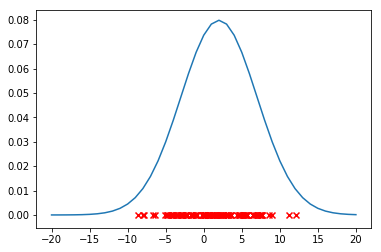

In [51]:
samples = np.arange(-20,21)
distrib= np.hstack(((distribution[:,np.newaxis]),np.zeros(distribution1.shape))) 

plt.plot(samples,plt.mlab.normpdf(samples, mean, std_dev))
plt.scatter(distrib[:,0],distrib[:,1], color='r', marker='x')
plt.show()

### Task2:
* Implement the likelihood function in python (you can simply use the existing python implementations)
* Use a general optimization method to find the values for $\mu$ and $\sigma^2$.

### Task3:

Given:
<br>
$\mu = \begin{bmatrix}
      0\\[0.3em]
      0\\[0.3em]
     \end{bmatrix}$
<br>
$\Sigma = \begin{bmatrix}
      0.5 & 0\\[0.3em]
      0 & 0.5\\[0.3em]
     \end{bmatrix}$
<br>
1. Visualise a Gaussian with the given parameters.
2. Visualise a marginal Gaussian.
3. Visualise a slice of Gaussian.